In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import date

In [3]:
from datetime import timedelta
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
def GetPrices(stocks,period=date(2015,1,1)):
    PricesDaily=DataReader(stocks,"yahoo",period)
    PricesDaily=PricesDaily['Adj Close']
    return PricesDaily

In [4]:
stocks=['SPY']

In [6]:
Spy = GetPrices(stocks=stocks)

In [10]:
SpyRet = Spy.pct_change().dropna()*100

Text(0.5, 0, 'SPY return')

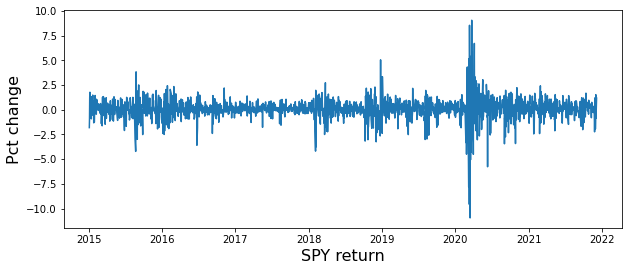

In [11]:
plt.figure(figsize=(10,4))
plt.plot(SpyRet)
plt.ylabel('Pct change', fontsize=16)
plt.xlabel('SPY return', fontsize=16)

Determine model using PACF

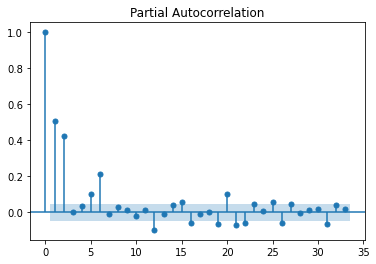

In [18]:
plot_pacf(SpyRet**2) ##why squared
plt.show()

GARCH (2,2)

In [22]:
model = arch_model(SpyRet, p=2, q=2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 10722.065308313851
Iteration:      2,   Func. Count:     20,   Neg. LLF: 9586.961048595726
Iteration:      3,   Func. Count:     31,   Neg. LLF: 3760.9115725618667
Iteration:      4,   Func. Count:     40,   Neg. LLF: 2908.584993687896
Iteration:      5,   Func. Count:     48,   Neg. LLF: 2443.483104062534
Iteration:      6,   Func. Count:     57,   Neg. LLF: 2119.429749158527
Iteration:      7,   Func. Count:     65,   Neg. LLF: 2105.961115498805
Iteration:      8,   Func. Count:     72,   Neg. LLF: 2105.6652728070776
Iteration:      9,   Func. Count:     79,   Neg. LLF: 2106.1370147970083
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2105.5426691777566
Iteration:     11,   Func. Count:     95,   Neg. LLF: 2105.525776704427
Iteration:     12,   Func. Count:    102,   Neg. LLF: 2105.517756516488
Iteration:     13,   Func. Count:    109,   Neg. LLF: 2105.517170476694
Iteration:     14,   Func. Count:    116,   Neg. LLF: 2105.

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2105.52
Distribution:                  Normal   AIC:                           4223.03
Method:            Maximum Likelihood   BIC:                           4255.82
                                        No. Observations:                 1744
Date:                Mon, Dec 06 2021   Df Residuals:                     1743
Time:                        20:15:12   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0936  1.633e-02      5.733  9.856e-09 [6.161e-02,  0.126]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0835  2.122e-02      3.933  8.393e-05 [4.187e-02,  0.125]
alpha[1]       0.2258  5.113e-02      4.416  1.007e-05   [  0.126,  0.326]
alpha[2]       0.1927  4.848e-02      3.975  7.034e-05 [9.770e-02,  0.288]
beta[1]        0.0000  9.494e-02      0.000      1.000   [ -0.186,  0.186]
beta[2]        0.5149  6.643e-02      7.751  9.088e-15   [  0.385,  0.645]
==========================================================================

Covariance estimator: robust
"""

GARCH (1,1)

In [26]:
model = arch_model(SpyRet, p=1, q=1)
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15854.666700672933
Iteration:      2,   Func. Count:     16,   Neg. LLF: 10048.908087964526
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3766.908174746066
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2294.345545002809
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2111.273467939036
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2130.5015169753633
Iteration:      7,   Func. Count:     50,   Neg. LLF: 2105.8596719838924
Iteration:      8,   Func. Count:     55,   Neg. LLF: 2105.8574645032954
Iteration:      9,   Func. Count:     60,   Neg. LLF: 2105.8574276855343
Iteration:     10,   Func. Count:     65,   Neg. LLF: 2105.8574267461718
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2105.8574267461718
            Iterations: 10
            Function evaluations: 65
            Gradient evaluations: 10


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2105.86
Distribution:                  Normal   AIC:                           4219.71
Method:            Maximum Likelihood   BIC:                           4241.57
                                        No. Observations:                 1744
Date:                Mon, Dec 06 2021   Df Residuals:                     1743
Time:                        20:21:15   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0947  1.625e-02      5.826  5.674e-09 [6.284e-02,  0.127]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0475  1.205e-02      3.938  8.202e-05 [2.384e-02,7.109e-02]
alpha[1]       0.2405  4.046e-02      5.943  2.802e-09     [  0.161,  0.320]
beta[1]        0.7221  3.468e-02     20.824  2.636e-96     [  0.654,  0.790]
============================================================================

Covariance estimator: robust
"""

Predicting volatility

In [47]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = SpyRet[:-(test_size-i)]
    model = arch_model(train, p =1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1, reindex='False')
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [48]:
rolling_predictions = pd.Series(rolling_predictions, index = SpyRet.index[-365:])

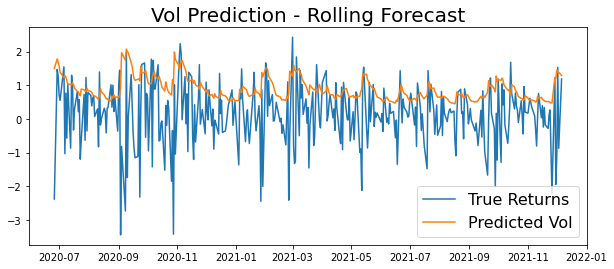

In [49]:
plt.figure(figsize=(10,4))
true, = plt.plot(SpyRet[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Vol Prediction - Rolling Forecast', fontsize = 20)
plt.legend(['True Returns', 'Predicted Vol'], fontsize = 16)

Using the model

In [77]:
train = SpyRet
model = arch_model(train, p=1, q=1)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=7, reindex='False')
future_dates = [SpyRet.index[-1] + timedelta(days=i) for i in range (1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Vol Prediction - Next 7 days')

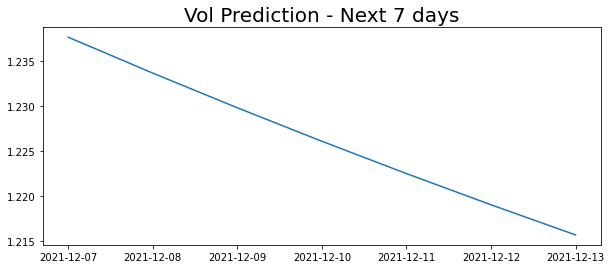

In [78]:
plt.figure(figsize=(10,4))
plt.plot(pred)  ##this cant be correct, check later###
plt.title('Vol Prediction - Next 7 days', fontsize=20)